In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [50]:
def load_stock_data(path):
    data = pd.read_csv(path, index_col='Date', parse_dates=True)
    data.columns = [col.strip().title().replace(' ', '_') for col in data.columns]
    data.dropna(inplace=True)
    return data

In [51]:
# --- Function 2: Add TA-Lib Indicators ---
def add_ta_indicators(data):
    data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
    data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
    macd, macd_signal, _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    data['MACD'] = macd
    data['MACD_Signal'] = macd_signal
    return data

In [52]:
# --- Function 3: Compute Financial Metrics ---
def compute_financial_metrics(data):
    returns = data['Close'].pct_change().dropna()
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)
    metrics_df = pd.DataFrame({
        'Metric': ['Annualized Volatility', 'Annualized Sharpe Ratio'],
        'Value': [volatility, sharpe_ratio]
    })
    return metrics_df

In [60]:

def plot_price_with_sma(data):
    sns.set(style='whitegrid')
    plt.figure(figsize=(14, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['SMA_20'], label='SMA 20', linestyle='--', color='orange')
    plt.title('Close Price and 20-Day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [61]:
def plot_rsi(data):
    plt.figure(figsize=(14, 3))
    plt.plot(data['RSI'], label='RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [62]:
def plot_macd(data):
    plt.figure(figsize=(14, 4))
    plt.plot(data['MACD'], label='MACD', color='purple')
    plt.plot(data['MACD_Signal'], label='Signal Line', color='red', linestyle='--')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.title('MACD and Signal Line')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [54]:

# --- Function 5: Display Indicator Table ---
def show_ta_table(data):
    print("\n📊 TA-Lib Indicators (Last 5 rows):")
    display(data[['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_Signal']].tail().style.format("{:.2f}"))


In [56]:
def show_metrics_table(metrics_df):
    print("\n📈 Financial Metrics:")
    display(metrics_df.style.format({'Value': '{:.4f}'}))


📊 TA-Lib Indicators (Last 5 rows):


,Close,SMA_20,RSI,MACD,MACD_Signal
Date,,,,,
2024-07-24 00:00:00,174.37,185.50,37.43,-0.03,1.57
2024-07-25 00:00:00,169.16,184.69,32.28,-1.11,1.04
2024-07-26 00:00:00,168.68,183.78,31.84,-1.97,0.43
2024-07-29 00:00:00,171.13,183.17,36.55,-2.43,-0.14
2024-07-30 00:00:00,171.86,182.53,37.92,-2.71,-0.65



📈 Financial Metrics:


,Metric,Value
0,Annualized Volatility,0.3067
1,Annualized Sharpe Ratio,0.8452


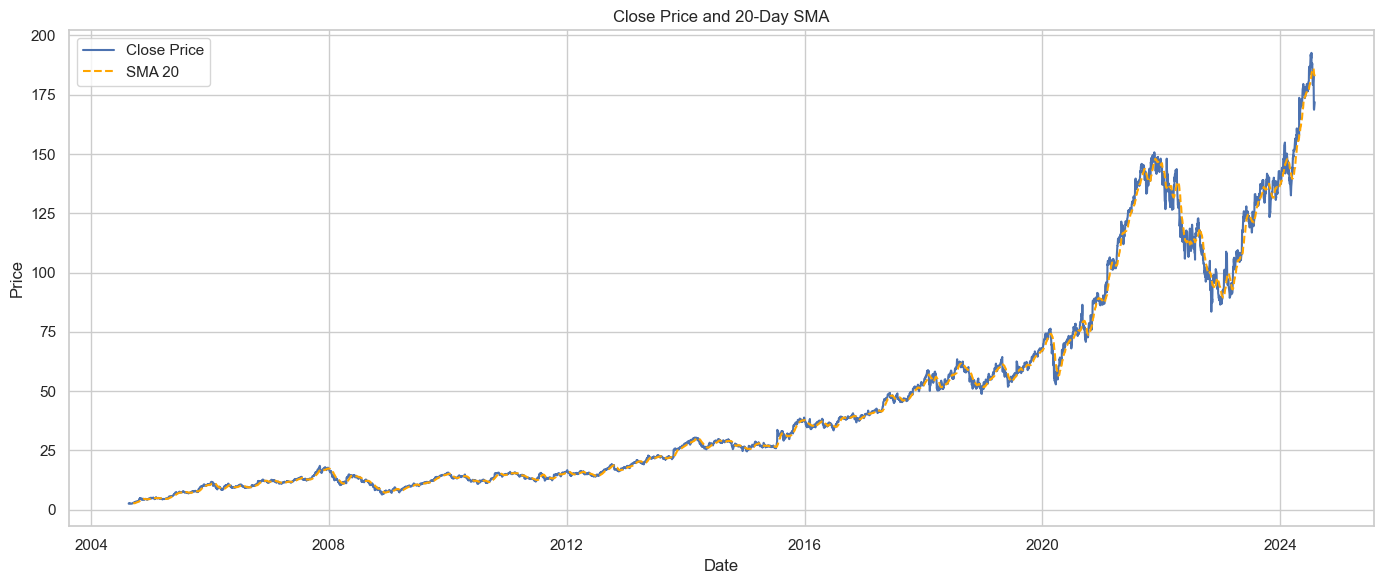

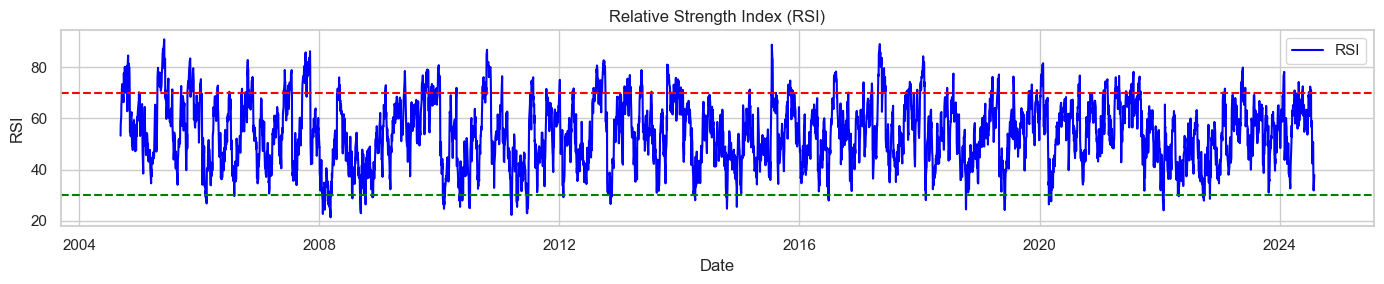

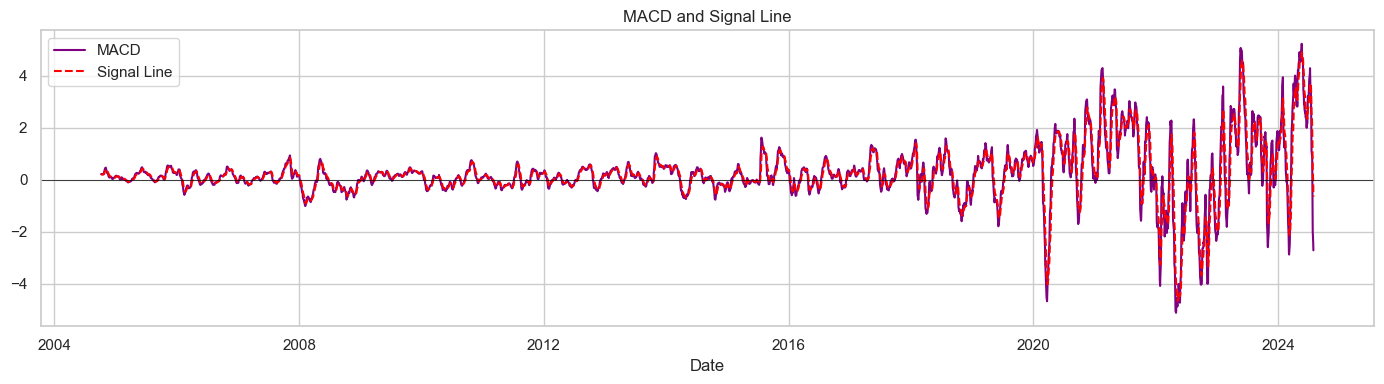

In [63]:
# Load and analyze
data_path = '../data/yfinance_data/GOOG_historical_data.csv'  # ← update this
data = load_stock_data(data_path)

# Add indicators
data = add_ta_indicators(data)

# Compute metrics
metrics_df = compute_financial_metrics(data)

# Display output
show_ta_table(data)
show_metrics_table(metrics_df)
plot_price_with_sma(data)
plot_rsi(data)
plot_macd(data)
